<a href="https://colab.research.google.com/github/HanyAkoury/HotelReviews/blob/master/Hotel_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Reviews**
**AKOURY Hany**

[Google collab link](https://colab.research.google.com/drive/1TT0rbEMVc-DH9CkcxC6XkqEchnHomqTY)

##Imports and framing

In [0]:
# Data framing will occur from a server as shown below

# Imports
import pandas as pd

column_names = ['reviews.rating','reviews.text']

# Loading data for manipulation
project_data = pd.read_csv('http://christophe-rodrigues.fr/eval_reviews.csv', usecols=column_names, sep=";")
# Loading data for evaluation
eval_data = pd.read_csv('http://christophe-rodrigues.fr/eval_reviews.csv', usecols=column_names, sep=";")

# Simplier namings
df=project_data

#-Now let's take a look at our dataframe
df

,reviews.rating,reviews.text
0,3,"This hotel was nice and quiet. Did not know, t..."
1,4,We stayed in the king suite with the separatio...
2,3,"Parking was horrible, somebody ran into my ren..."
3,5,Not cheap but excellent location. Price is som...
4,2,If you get the room that they advertised on th...
...,...,...
9995,4,My friends and I took a trip to Hampton for th...
9996,5,"from check in to departure, staff is friendly,..."
9997,5,This Hampton is located on a quiet street acro...
9998,5,Awesome wings (my favorite was garlic parmesan...


## Text preprocessing

Our Goal is to preprocess the text and by preprocessing we mean:
Removing as much unwanted/not usefull information as we can. 
This will help a better word embeding.


Step by step we are going to process our text by :
1. Replacing our linguistic shortcuts by their full words using regex for identification and replacement
2. Cleaning our description with the tokenizing and the removal of stopwords
3. Determining word frequencies which will evaluate the relevance of a word ie: Less is better

**1. Replacing linguistic shortcuts by their full words using regex for identification and replacement**

In [0]:
# Imports
import numpy as np
import re

# First let's create an array containing our column: 'reviews.text'
df_copy = df.copy()
df_copy = df_copy.drop(df.columns[0],axis='columns')
nf = df_copy.to_numpy() #is our array that holds in each line a review

# Defining - replacement patterns for regex
replacement_patterns = [
    (r'’','\''),
    (r'“',''),
    (r'”',''),
    (r'doesn\'t', 'does not'),
    (r'don\'t', 'do not'),
    (r'won\'t', 'will not'),
    (r'can\'t', 'cannot'),
    (r'i\'m', 'i am'),
    (r'ain\'t', 'is not'),
    (r'(\w+)\'ll', '\g<1> will'),
    (r'(\w+)n\'t', '\g<1> not'),
    (r'(\w+)\'ve', '\g<1> have'),
    (r'(\w+)\'s', '\g<1> is'),
    (r'(\w+)\'re', '\g<1> are'),
    (r'(\w+)\'d', '\g<1> would'),
    (r'who\'ve', 'who have'),]

class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns): 
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s) 
        return s

# Creating an empty string so that the regexed review can be stored
reg_nf = []
rpl = RegexpReplacer()
for i in range(len(df)):
    reg_nf+=[rpl.replace(nf[i][0])]

# Replacing the ancient review by it's regexed version
df['reviews.text'] = reg_nf

**2. Cleaning our description with the tokenizing and the removal of stopwords**



In [0]:
# Imports
import nltk
#
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize as tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
#
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Defining - stopwords
stopwords = set(stopwords.words('english'))

# Detokenizer combines tokenized elements
detokenizer = TreebankWordDetokenizer()

# Removing special characters
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-z0-9\s]', '', text)
    return text

# Word Lemmatizer
lm=WordNetLemmatizer()


## clean_description will apply 
# 1- tokenisation to our sentences
# 2- stop words removal
# 3- Lemmatization
# 4- Detokenization
def clean_description(desc):
    desc = tokenize(desc.lower()) 
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    desc = [lm.lemmatize(word) for word in desc]
    return detokenizer.detokenize(desc)

df["cleaned_reviews.text"] = df["reviews.text"].apply(clean_description)
print("\ncleaning is done! - you can now find the cleaned description appended in a new column in our df")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.

cleaning is done! - you can now find the cleaned description appended in a new column in our df


**3. Determining word frequencies which will evaluate the relevance of a word ie: Less is better**

In [0]:
## Local visualisation of the preprocessed texts vs. the raw texts
print("-Raw review example:\n"+df['reviews.text'][120]+"\n\n-Cleaned review example:\n"+df['cleaned_reviews.text'][120])

-Raw review example:
The hotel is ok but considering you pay 19 a day for parking it should be better. There are not many normal parking spots. You frequently end up in a parking structure in the back and walking stairs to reach your car. Breakfast is as expected at any similar property. Very busy on the weekend. And no matter how busy it is at 10am the doors will be locked. We were done but several people missed out. Rooms were clean and comfortable. Housekeeping pounded on our door and brought us towels at night we did not ask for and when we told the front desk they acted like it was our fault for not refusing the towels.

-Cleaned review example:
hotel ok considering pay day parking better many normal parking spot frequently end parking structure back walking stair reach car breakfast expected similar property busy weekend matter busy door locked done several people missed room clean comfortable housekeeping pounded door brought u towel night ask told front desk acted like fault re

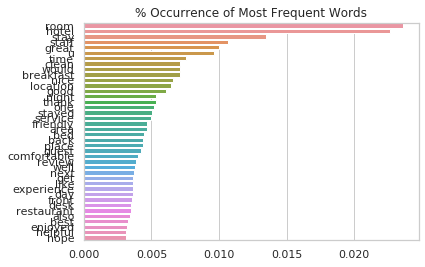

In [0]:
# Imports
import seaborn as sns 
import matplotlib.pyplot as plt

## Global visualisation of the number of word occurences

# set seaborn style 
sns.set(style="whitegrid")

## Computing word occurences to have a visual representation of them
word_occurrence = df["cleaned_reviews.text"].str.split(expand=True).stack().value_counts()
total_words = sum(word_occurrence)

# plot the 40 most common words
top_words = word_occurrence[:40]/total_words
ax = sns.barplot(x = top_words.values, y = top_words.index)

# Setting title 
ax.set_title("% Occurrence of Most Frequent Words")

plt.show()

In [0]:
# After visualising our plot we know that room stay and hotel are very frequent words and can estimate that they bring few meaning to our score.
# We will then proceed on removing them from the senteces

words_to_erase = ['hotel','room','stay','more','staff']

pat = r'\b(?:{})\b'.format('|'.join(words_to_erase))
df['cleaned_reviews.text'] = df['cleaned_reviews.text'].str.replace(pat,' ')

In [0]:
## Local visualisation of the preprocessed texts vs. the raw texts
print("-Raw review example:\n"+df['reviews.text'][120]+"\n\n-Super_cleaned review example:\n"+df['cleaned_reviews.text'][120])

-Raw review example:
The hotel is ok but considering you pay 19 a day for parking it should be better. There are not many normal parking spots. You frequently end up in a parking structure in the back and walking stairs to reach your car. Breakfast is as expected at any similar property. Very busy on the weekend. And no matter how busy it is at 10am the doors will be locked. We were done but several people missed out. Rooms were clean and comfortable. Housekeeping pounded on our door and brought us towels at night we did not ask for and when we told the front desk they acted like it was our fault for not refusing the towels.

-Super_cleaned review example:
  ok considering pay day parking better many normal parking spot frequently end parking structure back walking stair reach car breakfast expected similar property busy weekend matter busy door locked done several people missed   clean comfortable housekeeping pounded door brought u towel night ask told front desk acted like fault ref

## Deep Learning Model



### ***Imports***

In [0]:
#In order to create the deep Learning model we start off by importing our tools and activating the GPU connection

# Imports
import sklearn
#
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

!pip install tensorflow-hub
!pip install tensorflow-datasets
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

from keras.models import Model, load_model
from keras.layers import Dense, Embedding, Input, Activation, CuDNNGRU, Bidirectional, Dropout, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

TensorFlow 2.x selected.
Version:  2.0.0
Eager mode:  True
Hub version:  0.7.0
GPU is available


Using TensorFlow backend.


### **Softmax**

**The goal of this model is to be abel to do multi-class predictions.**

What this means is that the output of our neural network is to be compared to a vector(5,1) which includes 1 on one line and 0s on the rest.

**Example: **

*   **[1,0,0,0,0]** *is the vector that indicates the score 1*
*   **[0,1,0,0,0]** *............................... score 2 and etc.*

The ideal activation that helps us do that is : **Softmax**

*Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes. (5 in our case)*


In [0]:
# Now that we know the 'shape' of our output target we have to adapt our ratings so that they match that shape
# One hot encoding target
num_classes = 5 # 5 corresponding scores.

def onehot(arr, num_class):
    return np.eye(num_class)[np.array(arr.astype(int)).reshape(-1)-1]

y = onehot(df['reviews.rating'], num_classes)
y

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

**Train-test splits.**

Train-test spliting to ensure we can train the model and the evaluate it's accuracy

In [0]:
# Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['reviews.text'],y,test_size = 0.1)

**Train_Test - Train_val splits.**

Train_Test-Train_val splits gives an additional *layer* of validation.

In [0]:
# Train-Val split over Train
x_subtrain,x_subval,y_subtrain,y_subval = train_test_split(x_train,y_train,test_size = 0.2)

# Converting to numpy arrays
# train
x_subtrain=np.asarray(x_subtrain) 
x_subval=np.asarray(x_subval)
# validation
y_subtrain=np.asarray(y_subtrain)
y_subval=np.asarray(y_subval)

epochs:10 - batch_size:128 - train_acc:76.28% - train_loss:0.0679 - val_acc:59.11% - val_loss:0.1103

epochs:10 - batch_size:512 - train_acc:77.90% - train_loss:0.0647 - val_acc:59.50% - val_loss:0.1083

CPU times: user 18.3 s, sys: 903 ms, total: 19.2 s
Wall time: 14.8 s


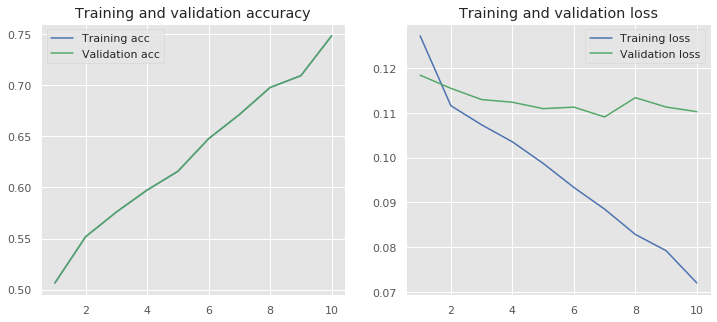

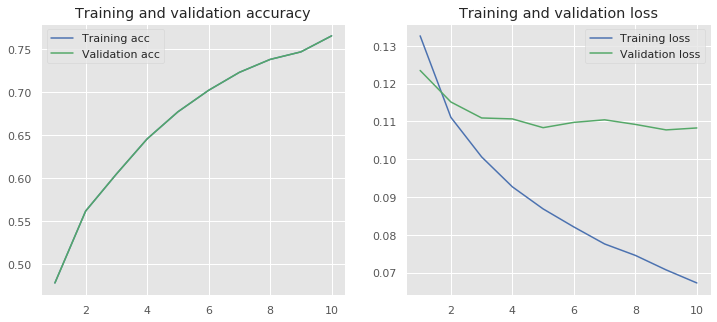

In [0]:
#Embedding words 
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[],dtype=tf.string, trainable=True)

# fitting parameters
batch_size = [128,512]
epochs = 10
validation_data = (x_subval,y_subval)
verbose = False

# compiling parameters
optimizer ='adam'
loss = 'mean_squared_error'
metrics=['accuracy']

#Setting up a useful list
infos=[]

# creating a function that initializes our model
def generate_model(optimizer,loss,metrics):
  model = tf.keras.Sequential()
  model.add(hub_layer)
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dense(5,activation='softmax'))
  model.compile(optimizer,loss,metrics)
  return model

# Ploting the history of loss and accuracy evolution using a user defined function
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
        acc = history.history['accuracy']
        val_acc = history.history['accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, 'b', label='Training acc')
        plt.plot(x, val_acc, 'g', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(x, loss, 'b', label='Training loss')
        plt.plot(x, val_loss, 'g', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()

def model_creator(epochs,batch_size):
  
  # for loop to iterate different batch_sizes
  for i in range(len(batch_size)):
    #creating out model using the functions we defined earlier
    model=generate_model(optimizer,loss,metrics)
    history= model.fit(x_subtrain,y_subtrain,
                     batch_size[i],
                     epochs,
                     verbose,
                     validation_data=validation_data)
    # Evaluating the model
    tloss, taccuracy = model.evaluate(x_subtrain, y_subtrain, verbose=False)
    vloss, vaccuracy = model.evaluate(x_subval, y_subval, verbose=False)
    # plotting
    plot_history(history)
    # initialising the infos sub_strings
    training_accuracy = "- train_acc:{:.2f}".format(taccuracy*100)+"%"
    training_loss = "- train_loss:{:.4f}".format(tloss)
    validation_accuracy = "- val_acc:{:.2f}".format(vaccuracy*100)+"%"
    validation_loss = "- val_loss:{:.4f}".format(vloss)
    # concatenating the sub_strings
    info = "epochs:"+str(epochs)+" - batch_size:"+str(batch_size[i])+" "+str(training_accuracy)+" "+str(training_loss)+" "+str(validation_accuracy)+" "+str(validation_loss)
    print(info+"\n")
    
  
  infos.append(info)

  return model
# apply
%time softmax_predictor = model_creator(epochs,batch_size)

###**HUGE PAUSE - HUGE THINKING**

After looking at the unsatisfying accuracies and the inexplicable MSE loss, we decided to look a the problem from another angle.

Why not use logistic regression for our multiclass classification problem ? 
So we changed the necessary parameters and came up with a simplier way to predict the rating's output as follows

### **Regression Model**

---


**The goal of this model is to be abel to do multi-class predictions this time using linear regression.**



In [0]:
#Let's reset our y to it's numerical values rather than it's onehot encoded vectors
y = df['reviews.rating']

**Train-test splits.**

Train-test spliting to ensure we can train the model and the evaluate it's accuracy

In [0]:
# Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['reviews.text'],y,test_size = 0.1)

**Train_Test - Train_val splits.**

Train_Test-Train_val splits gives an additional *layer* of validation.

In [0]:
# Train-Val split over Train
x_subtrain,x_subval,y_subtrain,y_subval = train_test_split(x_train,y_train,test_size = 0.2)

# Converting to numpy arrays
# train
x_subtrain=np.asarray(x_subtrain) 
x_subval=np.asarray(x_subval)
# validation
y_subtrain=np.asarray(y_subtrain)
y_subval=np.asarray(y_subval)

Epochs:10 - Batch size:16 - training_mse loss:0.115 - validation_mse loss:0.644

CPU times: user 31.4 s, sys: 2.54 s, total: 33.9 s
Wall time: 21.8 s


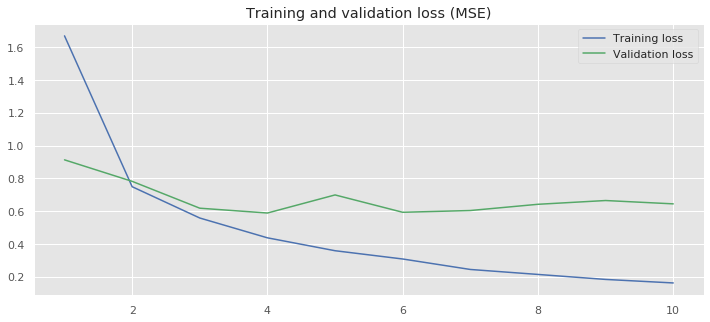

In [0]:
#Embedding words 
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[],dtype=tf.string, trainable=True)

# fitting parameters
batch_size = 16
epochs = 10
validation_data = (x_subval,y_subval)
verbose = False
# compiling parameters
optimizer ='adam'
loss = 'mean_squared_error'
metrics=['mse']

# function that generates our model
def generate_model(optimizer,loss,metrics):
  model = tf.keras.Sequential()
  model.add(hub_layer)
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dense(1,activation='relu'))
  model.compile(optimizer,loss,metrics)
  return model

# Ploting the history of loss (MSE) evolution using a user defined function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        # x abscisse
        x = range(1, len(loss) + 1)
        # plot settings
        plt.figure(figsize=(12, 5))
        # subplot settings
        plt.subplot(1, 1, 1)
        plt.plot(x, loss, 'b', label='Training loss')
        plt.plot(x, val_loss, 'g', label='Validation loss')
        plt.title('Training and validation loss (MSE)')
        plt.legend()

# function that generates a model using the previous function (generate_model) 
# and applies metrics and plotting (plot_history )to view it's performance on the splits
def model_creator(epochs,batch_size):  
  # creating out model using the functions we defined earlier
  model=generate_model(optimizer,loss,metrics)
  # we define history (our model.fit) to be able to plot the loss/learning history curve
  history= model.fit(x_subtrain,y_subtrain,
                    batch_size,
                    epochs,
                    verbose,
                    validation_data=validation_data)   
  # plotting
  plot_history(history)
  last_model = model
  
  # evaluation
  tloss, taccuracy = model.evaluate(x_subtrain,  y_subtrain, verbose=False)
  vloss, vaccuracy = model.evaluate(x_subval, y_subval, verbose=False)
  training_loss = "- training_mse loss:{:.3f}".format(tloss)
  validation_loss = "- validation_mse loss:{:.3f}".format(vloss)

  # more plotting
  info = "Epochs:"+str(epochs)+" - Batch size:"+str(batch_size)+" "+str(training_loss)+" "+str(validation_loss)
  print(info+"\n")

  return last_model


# apply the function
%time linear_predictor = model_creator(epochs,batch_size)

In [0]:
# Final Cell
# Where it all ends
# After preprocessing our text, training our model, choosing the best parameters let's now calculate the MSE using the evaluation test

from sklearn.metrics import mean_squared_error

eval_predicted = linear_predictor.predict(eval_data['reviews.text'])

# The printed MSE in the output is not the right one ! it will differ when using the real evaluation set

print("The MSE between the super model's predictions and the actual ratings is: ")
print("-------")
print(mean_squared_error((np.round(eval_predicted).reshape(-1)),eval_data['reviews.rating']))
print("-------")
print("THE END")

The MSE between the super model's predictions and the actual ratings is: 
-------
0.3111
-------
THE END
